# Variance of the linear matter power spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from compos import const, matterps, growthfactor as gf
from MgIIabs.model import halomassfunc as hmf
from MgIIabs.model import halomodel as hmod
from astropy.units.astrophys import Mpc, Msun
import time
import cProfile

In [33]:
hmod.rg(1e18*Msun, z=2.5)

<Quantity 2.285714285714285 Mpc>

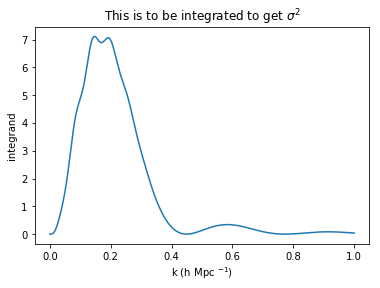

In [11]:
const.initializecosmo(z=2)
h = const.cosmo['h']

R = 10/h
high = 10/R/h
k = 10**np.linspace(-8,np.log10(high),10000)*h


P = matterps.normalizedmp(k)
W = hmf.window_th(k,R)

integrand = k*k*W*W*P*k

plt.plot(k/h,integrand)
plt.ylabel('integrand')
plt.xlabel('k (h Mpc $^{-1}$)')
plt.title('This is to be integrated to get $\sigma^2$')
plt.show()

In [3]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the 

In [5]:
integrand = lambda x,R: (x*hmf.window_th(x,R))**2*matterps.normalizedmp(x*const.cosmo['h'])
variance = lambda R: quad(integrand,1e-5,1000,args=(R,))[0]/(2*np.pi)**2
variance(8)# Without log

1.1517464532667354

In [2]:
hmf.psvariance(np.array([8,10])) #With log transformation. Do not delete!

> /home/sunil/Python/MgIIabs/MgIIabs/model/halomassfunc.py(81)psvariance()
-> integral = log(10)*quad(integrand,low,high)[0]/(2*pi)**2
(Pdb) matterps.normalisedmp(1)
*** AttributeError: module 'compos.matterps' has no attribute 'normalisedmp'
(Pdb) q


BdbQuit: 

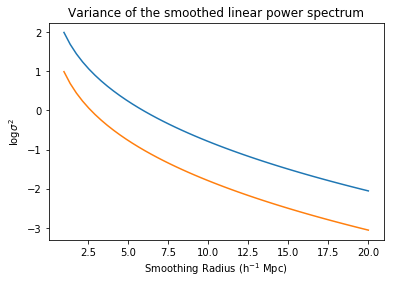

In [2]:
rad = np.linspace(1,20)/const.cosmo['h']
variance = np.asarray([hmf.psvariance(radius) for radius in rad])
variance2 = np.asarray([hmf.psvariance(radius,growthf=gf.growfunc_z(1)) for radius in rad])
plt.plot(rad*const.cosmo['h'],np.log(variance),rad*const.cosmo['h'],np.log(variance2))
plt.xlabel('Smoothing Radius (h$^{-1}$ Mpc)')
plt.ylabel('log$\sigma^2$')
plt.title('Variance of the smoothed linear power spectrum')
plt.show()

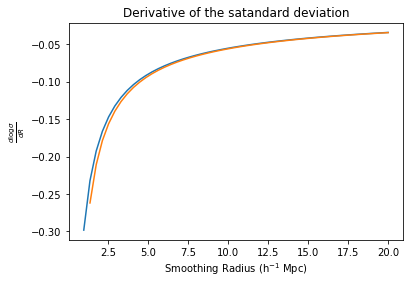

In [4]:
gfunc = gf.growfunc_z(2)
dlogvardR = np.asarray([hmf.dlogsigma_dr(radius) for radius in rad])
another = 0.5*np.diff(np.log(variance))/np.diff(rad)
plt.plot(rad*const.cosmo['h'],dlogvardR,rad[1:]*const.cosmo['h'],another)
plt.xlabel('Smoothing Radius (h$^{-1}$ Mpc)')
plt.ylabel(r'$\frac{d\log\sigma}{dR}$')
plt.title('Derivative of the satandard deviation')
plt.show()

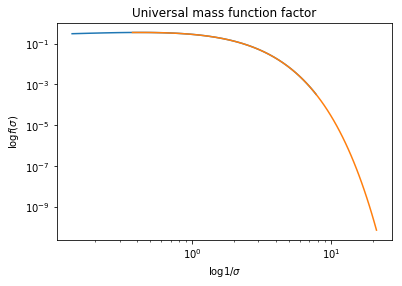

In [6]:
x = 1/variance
y = hmf.f_of_sigma(np.sqrt(variance))
x2 = 1/variance2
y2 = hmf.f_of_sigma(np.sqrt(variance2))
plt.loglog(x,y,x2,y2)
plt.xlabel('log$1/\sigma$')
plt.ylabel(r'log$f(\sigma)$')
plt.title('Universal mass function factor')
plt.show()

In [24]:
import time
import cProfile
cProfile.run("hmf.psvariance(1,low=-7,high=2)")

         40713 function calls in 0.182 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:995(_handle_fromlist)
        1    0.000    0.000    0.182    0.182 <string>:1(<module>)
     1197    0.010    0.000    0.010    0.000 halomassfunc.py:21(window_th)
        1    0.000    0.000    0.182    0.182 halomassfunc.py:45(psvariance)
     1197    0.005    0.000    0.180    0.000 halomassfunc.py:76(integrand)
     1197    0.003    0.000    0.165    0.000 matterps.py:105(normalizedmp)
     1197    0.013    0.000    0.158    0.000 matterps.py:48(delta2)
     1197    0.003    0.000    0.161    0.000 matterps.py:79(matterps)
     1197    0.001    0.000    0.001    0.000 matterps.py:93(sigma8)
        1    0.000    0.000    0.182    0.182 quadpack.py:370(_quad)
        1    0.000    0.000    0.182    0.182 quadpack.py:44(quad)
     3591    0.003    0.000    0.00

In [18]:
hmf.psvariance(1),hmf.psvariance(1,high=2)

(10.306859803631319, 10.306859315468285)

In [8]:
hmf.psvariance(1,num=100000)

10.306859792346003

In [23]:
from astropy.table import Table
k=np.linspace(1e-8,1000,10000000+1)
psk = matterps.normalizedmp(k*const.cosmo['h'])
wkR = hmf.window_th(k,1)
integrand = (k*wkR)**2*psk/(2*np.pi)**2

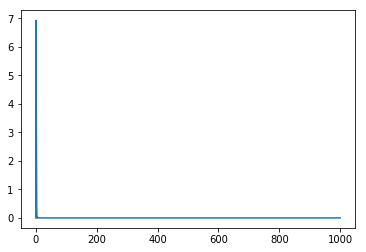

In [24]:
plt.plot(k,integrand)
plt.show()

In [10]:
cProfile.run("hmf.psvariance(1,num=10000)")

         97 function calls in 0.032 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:995(_handle_fromlist)
        1    0.000    0.000    0.032    0.032 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 _methods.py:31(_sum)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:1730(sum)
        1    0.000    0.000    0.000    0.000 function_base.py:13(_index_deprecate)
        2    0.000    0.000    0.000    0.000 function_base.py:1848(diff)
        1    0.000    0.000    0.000    0.000 function_base.py:25(linspace)
        1    0.003    0.003    0.003    0.003 halomassfunc.py:21(window_th)
        1    0.002    0.002    0.032    0.032 halomassfunc.py:45(psvariance)
        1    0.000    0.000    0.026    0.026 matterps.py:105(normalizedmp)
        1    0.002    0.002    0.024    0.024 matterps.py:48(delta2)
        1    0.002

In [39]:
simps(integrand[k<100],k[k<100])

10.306859302286027

## Precalculating the growth factor

The growth factor calculating function is pretty costly. It is best to reduce the computational load when calculating the power-spectrum variance by calculating it beforehand and passing it on to `psvariance`

In [3]:
cProfile.run("hmf.psvariance(1,z=1)") #Do not delete. This is with the growthfactor pre-calculated

         134271 function calls in 0.459 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:995(_handle_fromlist)
        1    0.000    0.000    0.459    0.459 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 const.py:27(initializecosmo)
        4    0.000    0.000    0.000    0.000 copy.py:125(_copy_with_constructor)
        4    0.000    0.000    0.000    0.000 copy.py:67(copy)
        1    0.000    0.000    0.237    0.237 growthfactor.py:108(growfunc_z)
        1    0.000    0.000    0.000    0.000 growthfactor.py:12(z2a)
      540    0.001    0.000    0.001    0.000 growthfactor.py:18(a2z)
    45900    0.063    0.000    0.063    0.000 growthfactor.py:24(w_z)
    45360    0.048    0.000    0.109    0.000 growthfactor.py:37(func)
     2160    0.004    0.000    0.169    0.000 growthfactor.py:41(exponent)
     1620    0.032    0.000   

In [2]:
cProfile.run("hmf.psvariance(1,z=1)") #Do not delete. This is without the precalculated growthfactor

         179841024 function calls (168892629 primitive calls) in 243.824 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:995(_handle_fromlist)
        1    0.000    0.000  243.824  243.824 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 const.py:27(initializecosmo)
     6552    0.012    0.000    0.012    0.000 copy.py:125(_copy_with_constructor)
     6552    0.019    0.000    0.034    0.000 copy.py:67(copy)
     1638    0.008    0.000  243.356    0.149 growthfactor.py:108(growfunc_z)
     1638    0.001    0.000    0.001    0.000 growthfactor.py:12(z2a)
   912366    1.461    0.000    1.461    0.000 growthfactor.py:18(a2z)
 77551110   65.441    0.000   65.441    0.000 growthfactor.py:24(w_z)
 76638744   51.201    0.000  114.756    0.000 growthfactor.py:37(func)
  3649464    4.117    0.000  176.482    0.000 growthfactor.py:41(exponen

Clearly, you don't want to make this mistake. The function has now been modified to take the growthfactor as a mandatory argument. It can be called as shown below:

In [6]:
hmf.psvariance(R=1,growthf=growthfactor.growfunc_z(1))

3.783520592240817

In [7]:
#looking at profiling:
cProfile.run('hmf.psvariance(R=1,growthf=gf.growfunc_z(1))')

         134271 function calls in 0.281 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:995(_handle_fromlist)
        1    0.000    0.000    0.280    0.280 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 const.py:27(initializecosmo)
        4    0.000    0.000    0.000    0.000 copy.py:125(_copy_with_constructor)
        4    0.000    0.000    0.000    0.000 copy.py:67(copy)
        1    0.000    0.000    0.172    0.172 growthfactor.py:108(growfunc_z)
        1    0.000    0.000    0.000    0.000 growthfactor.py:12(z2a)
      540    0.001    0.000    0.001    0.000 growthfactor.py:18(a2z)
    45900    0.048    0.000    0.048    0.000 growthfactor.py:24(w_z)
    45360    0.038    0.000    0.085    0.000 growthfactor.py:37(func)
     2160    0.003    0.000    0.127    0.000 growthfactor.py:41(exponent)
     1620    0.022    0.000   

Whenever a higher level function needs to use psvariance, it can call it once and be done with it. No problem

In [6]:
matterps.normalizedmp(np.array([1,2]))

array([ 91.44496967,  17.03796598])